# Learning Curve

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import pandas as pd

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

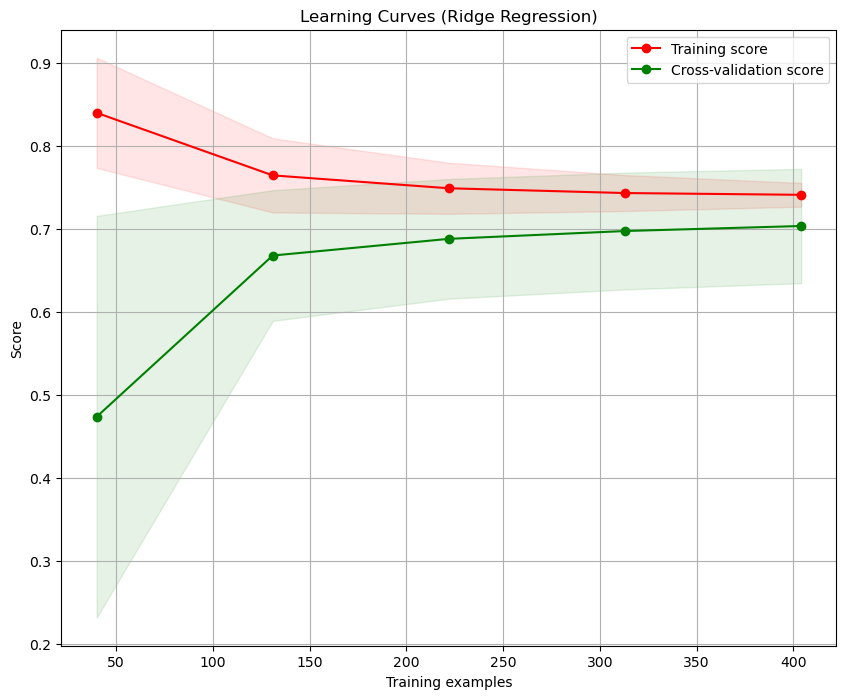

In [8]:
bd = pd.read_csv('Boston.csv')
bd = bd.loc[:, ~bd.columns.str.contains('^Unnamed')]
y = bd['medv'].values
X = bd.drop('medv', axis=1)

title = "Learning Curves (Ridge Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = Ridge()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

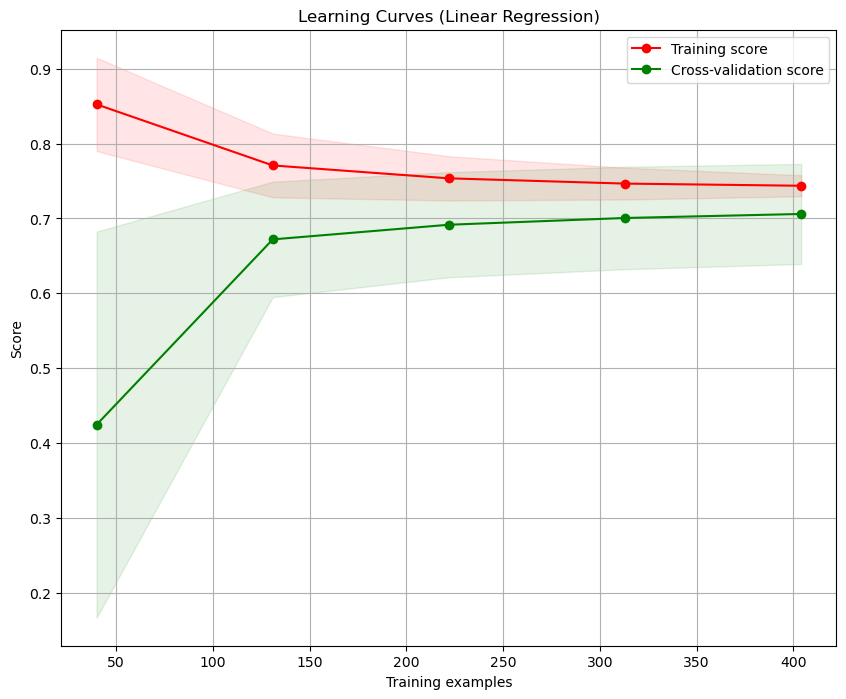

In [11]:
from sklearn.linear_model import LinearRegression

bd = pd.read_csv('Boston.csv')
bd = bd.loc[:, ~bd.columns.str.contains('^Unnamed')]
y = bd['medv'].values
X = bd.drop('medv', axis=1)

title = "Learning Curves (Linear Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

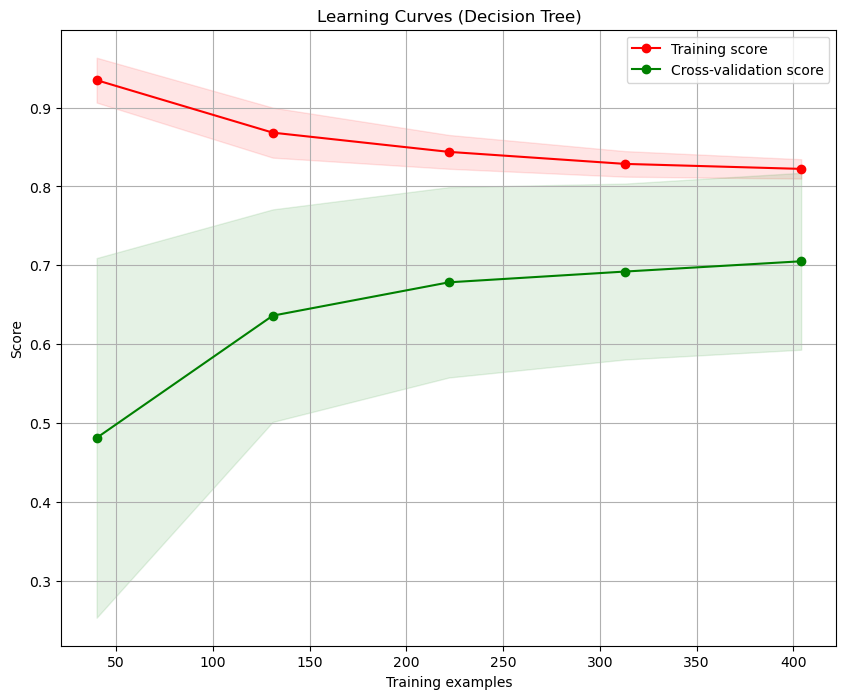

In [13]:
from sklearn.tree import DecisionTreeRegressor

bd = pd.read_csv('Boston.csv')
bd = bd.loc[:, ~bd.columns.str.contains('^Unnamed')]
y = bd['medv'].values
X = bd.drop('medv', axis=1)

title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeRegressor(max_depth = 3)
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

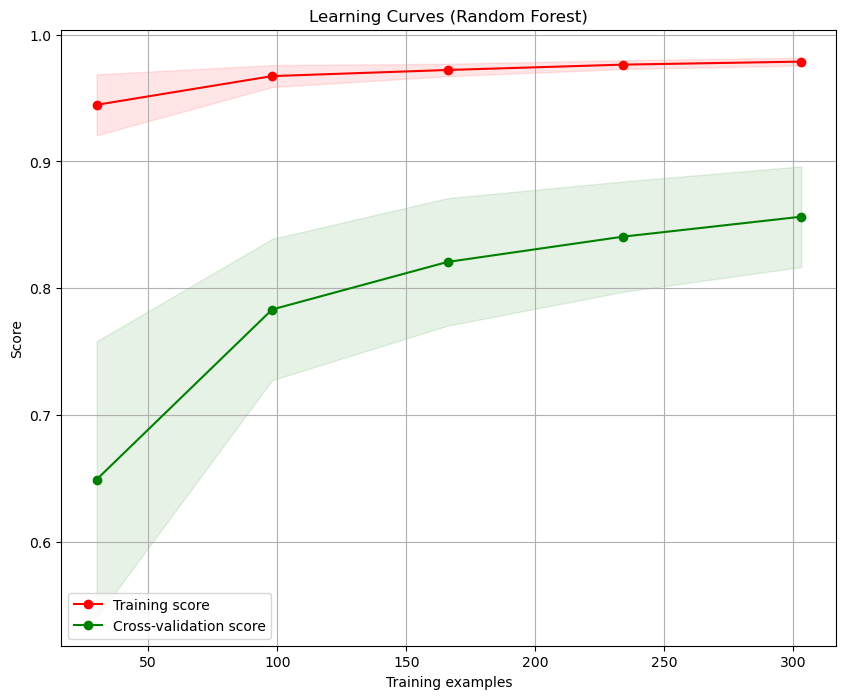

In [18]:
from sklearn.ensemble import RandomForestRegressor

bd = pd.read_csv('Boston.csv')
bd = bd.loc[:, ~bd.columns.str.contains('^Unnamed')]
y = bd['medv'].values
X = bd.drop('medv', axis=1)

title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=100, test_size=0.4, random_state=0)
estimator = RandomForestRegressor(n_estimators = 200, criterion = 'friedman_mse')
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

# Validation Curve

In [25]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
X, y = data, target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)

train_scores, valid_scores = validation_curve(Ridge(), X, y, param_name="alpha", param_range=np.logspace(-5, 2, 10), cv=None, scoring=None)

print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.72928743 0.74012939 0.74171048 0.75209988 0.74916359]
 [0.72928743 0.74012939 0.74171048 0.75209988 0.74916359]
 [0.72928743 0.74012939 0.74171048 0.75209988 0.74916359]
 [0.72928739 0.74012936 0.74171045 0.75209985 0.74916356]
 [0.72928599 0.74012829 0.7417092  0.7520987  0.74916243]
 [0.72924074 0.74009379 0.74166874 0.75206159 0.74912591]
 [0.7282963  0.73937431 0.74080221 0.75127938 0.74835774]
 [0.7229516  0.73535169 0.73565107 0.7467595  0.7439673 ]
 [0.71585328 0.73073849 0.72905606 0.74039054 0.73852806]
 [0.70077101 0.71987986 0.71345571 0.72293609 0.72510449]]
[[0.77519219 0.73067086 0.71897655 0.69492276 0.69956685]
 [0.77519262 0.73067052 0.71897717 0.69492261 0.69956671]
 [0.77519521 0.73066851 0.7189809  0.69492171 0.69956585]
 [0.7752107  0.73065647 0.71900318 0.69491631 0.69956066]
 [0.77530137 0.73058414 0.71913414 0.69488353 0.69952882]
 [0.77577372 0.73014777 0.71983241 0.6946741  0.69931382]
 [0.77708991 0.72765688 0.72206467 0.69328386 0.69765395]
 [0.77719167 

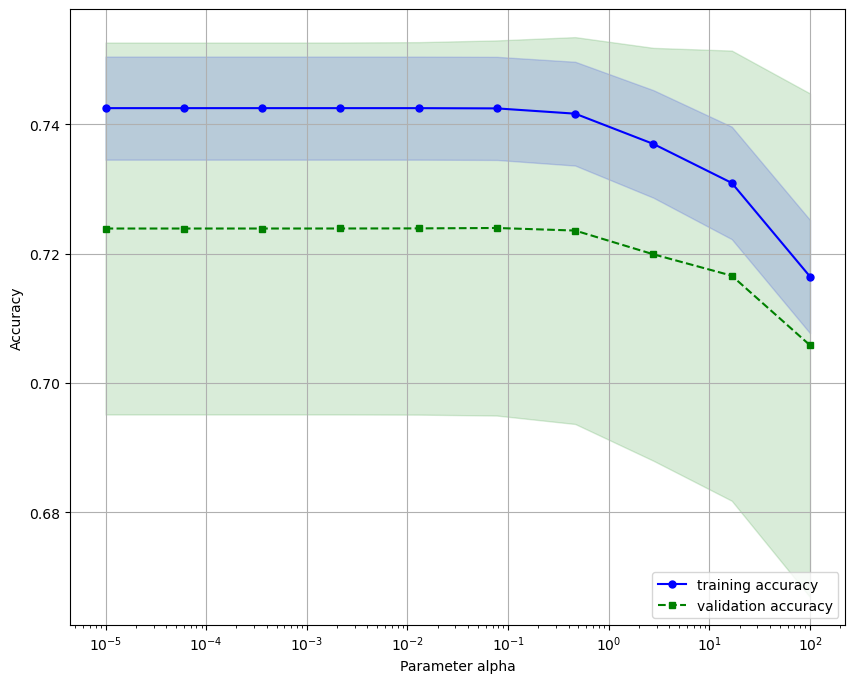

In [26]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()